In [1]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from Graph import *
from Azimuth import *
from math import sqrt
from copy import deepcopy, copy

import numpy as np

In [2]:
def vis(graph, xlim = None, ylim = None):
    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

    for edge in graph.edges:
        lat1 = min(edge.vertices).latitude
        long1 = min(edge.vertices).longitude

        lat2 = max(edge.vertices).latitude
        long2 = max(edge.vertices).longitude

        plt.plot([lat1, lat2], [long1, long2], marker = 'o')

    star_vertices = [vertex for vertex in graph.vertices if len(vertex.edges) == 1]
    for vertex in star_vertices:
        ax.plot(vertex.latitude, vertex.longitude, markersize=50)

    ax = plt.gca()
    
    if xlim != None:
        ax.set_xlim(xlim)
        
    if ylim != None:
         ax.set_ylim(ylim)

## Test the Graph class

In [3]:
graph = Graph(warnings = True)
graph.name = "1"

last_vertex = Vertex(-1, -1, 0, warnings = True)
graph.add_vertices(last_vertex)

for i in range(0,10):
    new_vertex = Vertex(i, i, 0, warnings = True)
    edge = Edge(vertices = [last_vertex, new_vertex], warnings = True)
    graph.add_vertices(new_vertex)
    last_vertex = new_vertex
    
graph_2 = Graph(warnings = True)
graph_2.name = "2"

last_vertex = Vertex(10, 10, 0, warnings = True)
graph_2.add_vertices(last_vertex)

for i in range(11,20):
    new_vertex = Vertex(i, i, 0, warnings = True)
    edge = Edge(vertices = [last_vertex, new_vertex], warnings = True)
    graph_2.add_vertices(new_vertex)
    last_vertex = new_vertex

In [4]:
graph.combine_graph(graph_2)

In [5]:
print(edge.vertices)
print(edge.graph)
edge.remove_vertices(edge.vertices)
print(edge.vertices)
print(edge.graph)

{<Vertex: 18,18,0>, <Vertex: 19,19,0>}
<Graph 1>
set()
None


In [6]:
print(len(graph.edges))
print(len(all_edges))
garbage_collection()
print(len(graph.edges))
print(len(all_edges))

18
19
18
18


## Angle graphifying

In [7]:
df = pd.read_csv("presets/0.csv")

In [8]:
tra = df["trajectory"].unique()[0]
dft = df[df["trajectory"] == tra]
graph_0 = create_azimuth_graph(dft, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_0.name = "0"

tra = df["trajectory"].unique()[1]
dft = df[df["trajectory"] == tra]
graph_1 = create_azimuth_graph(dft, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)
graph_1.name = "1"

print(len(graph_0.edges), len(graph_1.edges))

406 151


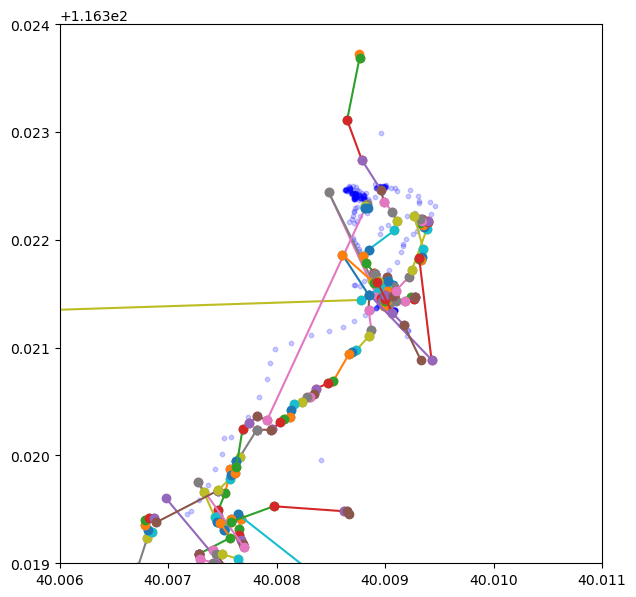

In [9]:
vis(graph_0, [40.006, 40.011], [116.319, 116.324])

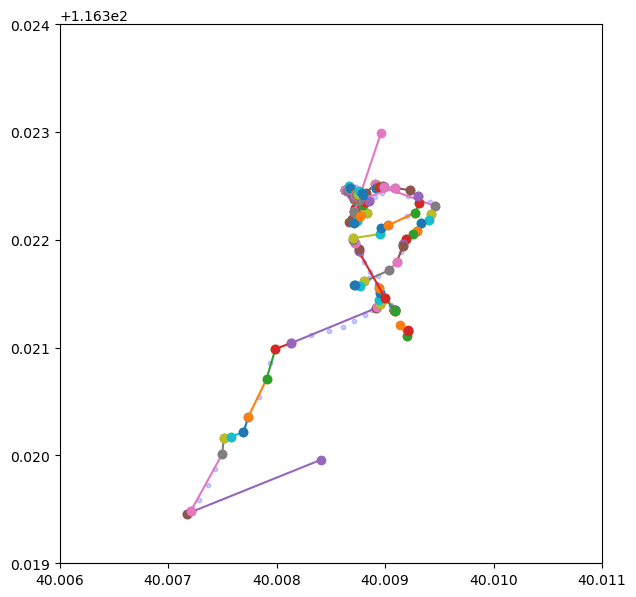

In [10]:
vis(graph_1, [40.006, 40.011], [116.319, 116.324])

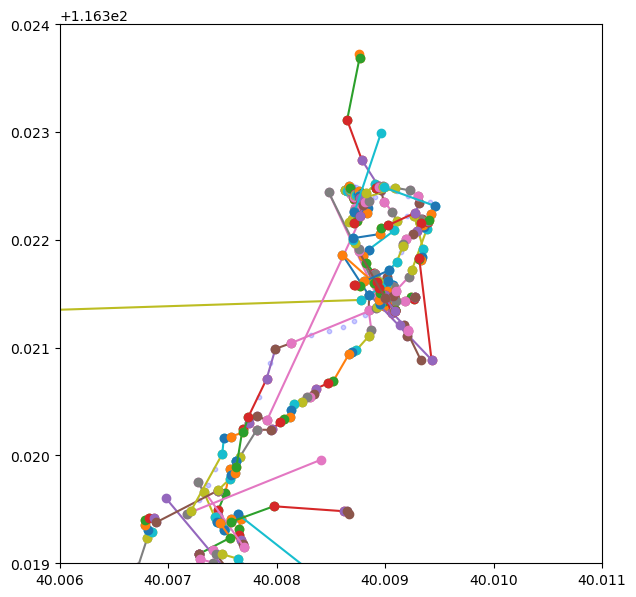

In [11]:
graph_0.combine_graph(graph_1)
vis(graph_0, [40.006, 40.011], [116.319, 116.324])

<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.9846855,116.31841750000001,150>
0.0
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984611,116.318026,150>
0.0
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984539,116.317294,152>
0.0007355324601942356
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984606,116.317065,154>
0.0009610130071998251
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984568,116.316911,155>
0.0011158288399198183
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984586,116.316716,157>
0.0013102385279061702
<Edge: (<Vertex: 39.984611,116.318026,150>) -> (<Vertex: 39.9846855,116.31841750000001,150>)>
<Vertex: 39.984516,116.3159

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.004799,116.320545,30>
0.002878358238293757
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.004868,116.32101,29>
0.0030267531409938413
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.004849,116.321153,31>
0.003118960427439449
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.008963,116.322994,-142>
0.003853884367663159
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.0049205,116.3212975,36>
0.003142305273788142
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.007459142857144,116.31944564285715,40>)>
<Vertex: 40.008481,116.32244,66>
0.0031639163578339406
<Edge: (<Vertex: 40.0076965,116.319166,40>) -> (<Vertex: 40.

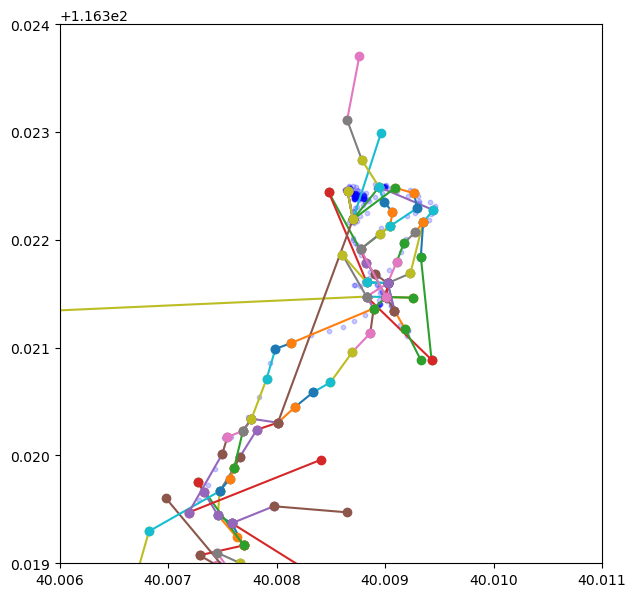

In [12]:
graph_0.merge_close_vertices()
garbage_collection()
graph_0.merge_vertices_to_edges()
vis(graph_0, [40.006, 40.011], [116.319, 116.324])

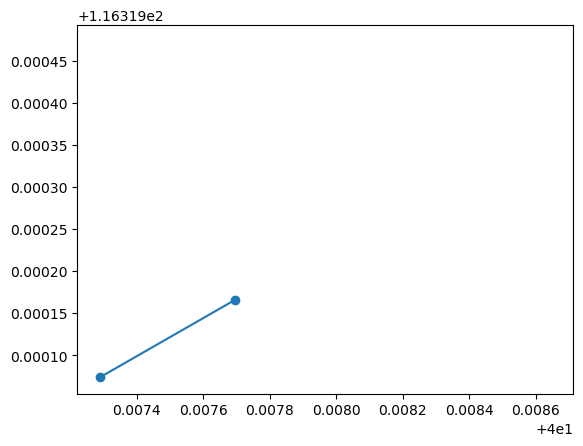

In [21]:

plt.plot([40.0072895, 40.007696], [116.319074, 116.319166], marker = 'o')
plt.plot(40.008645, 116.319473, color = "red")

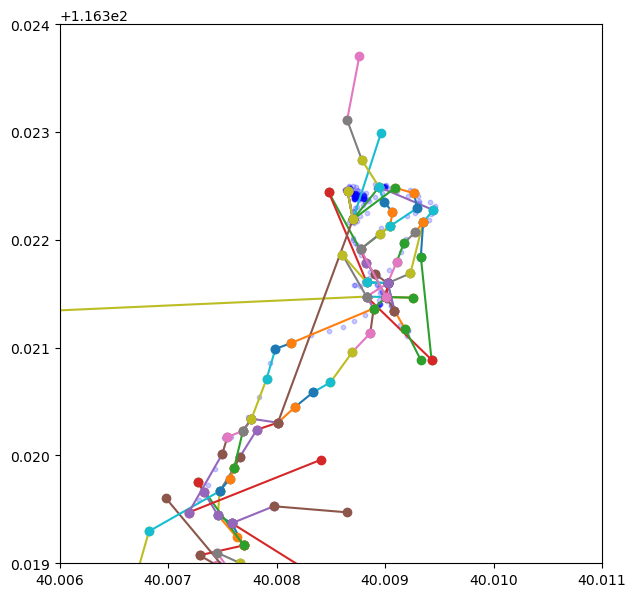

In [13]:
vis(graph_0, [40.006, 40.011], [116.319, 116.324])

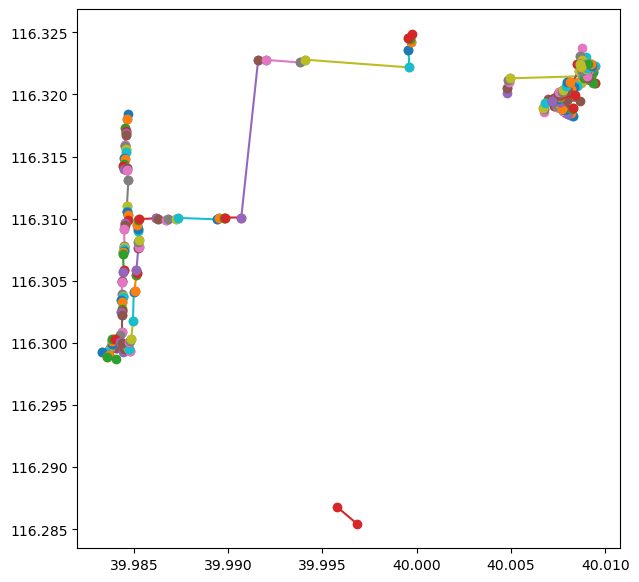

In [14]:
vis(graph_0)

In [15]:
# Additional idea: combine edges with similar angles
# For report we attempt to model the topology of a city (vertices, edges and planes) of a city from geographical data

### The actual graph

In [16]:
graph = create_azimuth_graph(dft, method = 4, splitting_method = 2, distance_multiplier = 5, max_angle_change = 15)

def vis(graph, xlim = None, ylim = None):
    fig, ax = plt.subplots(figsize = (7,7))
    ax.scatter(dft.latitude, dft.longitude, zorder=1, alpha= 0.2, c='b', s=10)

    for edge in graph.edges:
        lat1 = min(edge.vertices).latitude
        long1 = min(edge.vertices).longitude

        lat2 = max(edge.vertices).latitude
        long2 = max(edge.vertices).longitude

        plt.plot([lat1, lat2], [long1, long2], marker = 'o')

    star_vertices = [vertex for vertex in graph.vertices if len(vertex.edges) == 1]
    for vertex in star_vertices:
        ax.plot(vertex.latitude, vertex.longitude, markersize=50)

    ax = plt.gca()
    
    if xlim != None:
        ax.set_xlim(xlim)
        
    if ylim != None:
         ax.set_ylim(ylim)
        
    
    #ax.set_xlim([40.0035, 40.0115])
    #ax.set_ylim([116.3175, 116.3245])

    #ax.set_xlim([40.006, 40.009])
    #ax.set_ylim([116.318, 116.321])
    
    #ax.set_xlim([40.000, 40.005])
    #ax.set_ylim([116.320, 116.325])
    
    #print(f"reduced from {len(dft)} to {len(graph.vertices)} points")

In [17]:
# graph.simplify()
len(graph.vertices)
graph.merge_close_vertices()
len(graph.vertices)
graph.merge_vertices_to_edges()
# graph.simplify()

<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.00865438666667,116.32245353333333,48>
0.0
<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.00875703135888,116.32231699303135,29>
0.0
<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.008413,116.319962,150>
0.0023799894440074483
<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.00719,116.319471,-15>
0.0032488865191403946
<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.007499,116.320013,-12>
0.0026250765300124598
<Edge: (<Vertex: 40.00875703135888,116.32231699303135,29>) -> (<Vertex: 40.00865438666667,116.32245353333333,48>)>
<Vertex: 40.007546000000005,116.